In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics

In [111]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9], polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, labels=variables)
        for txt, angle in zip(text, angles):
            if 0 <= angle < 90 or 270 <= angle < 360:
                txt.set_horizontalalignment('left')
            elif 90 <= angle < 270:
                txt.set_horizontalalignment('right')
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            if np.count_nonzero(np.equal(np.mod(grid, 1), 0)) == len(grid):
                gridlabel = ["{:d}".format(x) for x in grid.astype(np.int16)]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                gridlabel = gridlabel[::-1]
            elif ranges[i][0] < ranges[i][1]:
                gridlabel[0] = "" # clean up origin
            if 0 <= angles[i] < 90:
                ax.set_rgrids(grid, labels=gridlabel, angle=angles[i],
                              ha='right', va='top')
            elif 90 <= angles[i] < 180:
                ax.set_rgrids(grid, labels=gridlabel, angle=angles[i],
                              ha='left', va='top')
            elif 180 <= angles[i] < 270:
                ax.set_rgrids(grid, labels=gridlabel, angle=angles[i],
                              ha='left', va='bottom')
            elif 270 <= angles[i] < 360:
                ax.set_rgrids(grid, labels=gridlabel, angle=angles[i],
                              ha='right', va='bottom')
            #ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)             

In [112]:
# example data
variables = ("Supply Current [µA]", "Offset Voltage [mV]", "GBW [MHz]", 
            "Bias Current [nA]", "Offset Current [nA]", "Slew Rate [V/µs]")
lmv324 = (410, 1.7, 1, 15, 5, 1)
lmv554 = (148, 1, 3, 20, 1, 1)
opa4191 = (560, 0.01, 2.2, 0.005, 0.002, 6)
ltc6255 = (260, 0.1, 6.5, 5, 2, 1.8)
ranges = [(0, 560), (0, 1.7), (6.5, 0), (0, 20), (0, 5), (6, 0)]  

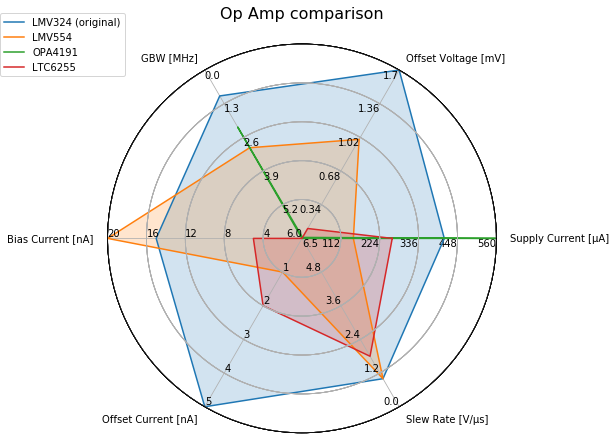

In [116]:
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(lmv324, label='LMV324 (original)')
radar.fill(lmv324, alpha=0.2)
radar.plot(lmv554, label='LMV554')
radar.fill(lmv554, alpha=0.2)
radar.plot(opa4191, label='OPA4191')
radar.fill(opa4191, alpha=0.2)
radar.plot(ltc6255, label='LTC6255')
radar.fill(ltc6255, alpha=0.2)
fig1.legend(bbox_to_anchor=(0.3,1))
plt.title('Op Amp comparison', fontsize=16)
plt.show() 

In [63]:
x = np.linspace(*(0, 560), num=6)
np.equal(np.mod(x, 1), 0)

array([ True,  True,  True,  True,  True,  True])